In [105]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
# Load dataset from Excel file
file_path = 'data/knn_data_1.csv'  # Replace with your Excel file path
# data = pd.read_excel(file_path)
data = pd.read_csv(file_path)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   168 non-null    float64
 1   Score   168 non-null    float64
 2   Label   168 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.1 KB


In [111]:
data.tail()


,Hours,Score,Label
163,4.5,63.0,1
164,2.0,61.0,1
165,6.0,65.0,1
166,6.0,70.0,1
167,2.0,30.0,0


In [112]:
# Ensure the dataset contains the required columns
if not {'Hours', 'Score', 'Label'}.issubset(data.columns):
    raise ValueError("The Excel file must contain 'Hours', 'Score', and 'Label' columns.")

# Split the data
X = data[['Hours', 'Score']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
print(X_test)

     Hours  Score
137    1.0   21.0
30     5.0   62.0
119    5.5   70.0
29     1.0   28.0
142    1.0   34.0
161    1.5   25.0
164    2.0   61.0
51     2.0   35.0
105    5.0   65.0
60     1.0   28.0
15     2.0   35.0
156    1.0   50.0
133    1.0   19.0
45     1.0   32.0
68     1.8   41.0
85     2.0   29.0
24     4.5   50.0
109    1.0   34.0
75     2.0   26.0
108    3.0   58.0
19     2.0   65.0
16     1.0   32.0
31     3.0   33.0
18    10.0   70.0
12     3.0   26.0
9      3.0   30.0
82     2.0   35.0
98     3.0   63.0
76     3.0   40.0
55     3.0   40.0
42     3.0   37.0
56     3.0   24.0
148    2.0   26.0
111    4.5   63.0
69     3.5   51.0
136    6.0   68.0
2      2.0   18.0
93     2.0   35.0
134    2.0   49.0
152    3.0   67.0
90     2.0   29.0
114    2.0   61.0
26     1.0   38.0
144    3.0   59.0
135    4.0   45.0
97     1.0   35.0
65     1.5   34.0
36     1.0   40.0
126    3.0   53.0
22     3.0   34.0
101    1.0   20.0


In [115]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [116]:
X_train_scaled

array([[ 2.62596326,  1.53269401],
       [-1.063841  , -0.25989406],
       [-1.063841  , -2.05248214],
       [ 0.90405461,  0.66959605],
       [-1.063841  , -1.58773708],
       [-0.0798932 , -1.18938417],
       [-1.063841  , -1.38856063],
       [ 0.90405461,  0.27124315],
       [-1.063841  , -0.72463912],
       [ 0.16609375,  0.204851  ],
       [-1.063841  , -0.12710976],
       [-1.063841  , -0.85742342],
       [-0.0798932 , -0.25989406],
       [-1.063841  , -0.59185482],
       [-0.0798932 , -0.79103127],
       [-0.0798932 ,  0.40402745],
       [-1.063841  , -1.45495278],
       [ 1.39602851, -0.06071761],
       [ 2.13398936,  1.59908616],
       [-1.063841  ,  0.204851  ],
       [-0.0798932 , -2.84918795],
       [ 0.4120807 ,  0.66959605],
       [-0.0798932 ,  1.26712541],
       [ 0.90405461,  0.93516466],
       [ 0.4120807 , -0.25989406],
       [-1.063841  , -1.52134493],
       [-0.5718671 , -1.05659987],
       [-1.063841  , -0.19350191],
       [-0.5718671 ,

In [117]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [118]:
# Predict
y_pred = knn.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [119]:
# Calculate confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

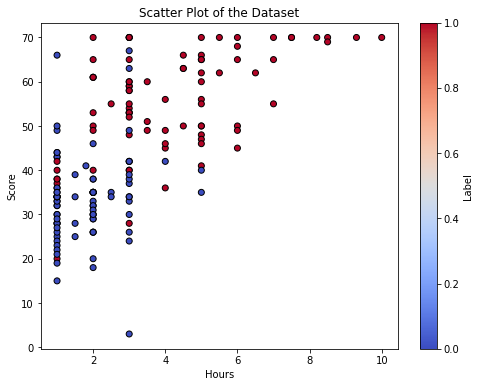

In [120]:
# Display the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Hours'], data['Score'], c=data['Label'], cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot of the Dataset')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.colorbar(label='Label')
plt.show()

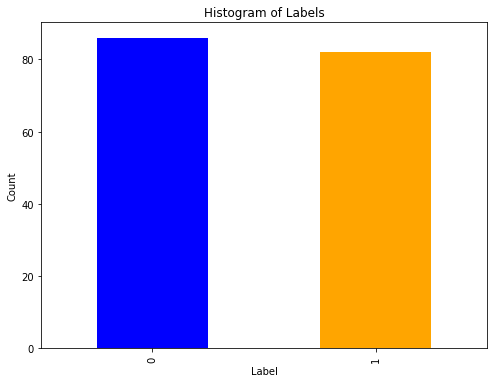

In [121]:
# Display the histogram
plt.figure(figsize=(8, 6))
data['Label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

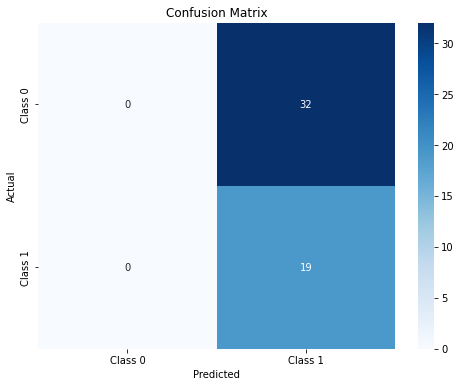

In [122]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [123]:
# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.37      1.00      0.54        19

    accuracy                           0.37        51
   macro avg       0.19      0.50      0.27        51
weighted avg       0.14      0.37      0.20        51



In [ ]:
pip install pandas openpyxl matplotlib scikit-learn seaborn

In [124]:
# Function to classify a new input using the trained KNN model
def classify_user_input(knn_model, scaler):
    print("\nEnter new data to classify:")
    try:
        # Ask the user for input values
        feature_1 = float(input("Enter value for Feature 1: "))
        feature_2 = float(input("Enter value for Feature 2: "))
        
        # Create a DataFrame for the new input
        new_data = pd.DataFrame({'Feature 1': [feature_1], 'Feature 2': [feature_2]})
        
        # Scale the input using the same scaler used for training
        new_data_scaled = scaler.transform(new_data)
        
        # Predict the class using the trained KNN model
        prediction = knn_model.predict(new_data_scaled)
        
        # Output the predicted class
        print(f"\nPredicted Class: {int(prediction[0])} (0 or 1)")
    except ValueError:
        print("Invalid input. Please enter numerical values for Feature 1 and Feature 2.")




In [126]:
# Example usage with the trained model
classify_user_input(knn, scaler)


Enter new data to classify:


Enter value for Feature 1:  3.0
Enter value for Feature 2:  50.0


Invalid input. Please enter numerical values for Feature 1 and Feature 2.
